In [3]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import time
import copy
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.multiclass import OneVsRestClassifier
from sklearn import linear_model
from sklearn.cluster import KMeans
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import SGDClassifier
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import RandomOverSampler
from sklearn.mixture import GaussianMixture
from sklearn.model_selection import StratifiedShuffleSplit
import collections
from imblearn.datasets import fetch_datasets
from sklearn.preprocessing import StandardScaler, RobustScaler
from imblearn.under_sampling import NearMiss
from imblearn.over_sampling import SMOTE
from imblearn.metrics import classification_report_imbalanced
from sklearn.metrics import average_precision_score, precision_recall_curve, precision_score, recall_score, f1_score, roc_auc_score, accuracy_score, classification_report, confusion_matrix
from collections import Counter
from sklearn.model_selection import KFold, StratifiedKFold, train_test_split, StratifiedShuffleSplit
import warnings
warnings.filterwarnings("ignore")

file_path = '/Users/bpratyush/Downloads/Project/Dataset/KDDTrain+.csv'
col_names = ["duration", "protocol_type", "service", "flag", "src_bytes",
             "dst_bytes", "land_f", "wrong_fragment", "urgent", "hot", "num_failed_logins",
             "logged_in", "num_compromised", "root_shell", "su_attempted", "num_root",
             "num_file_creations", "num_shells", "num_access_files", "num_outbound_cmds",
             "is_host_login", "is_guest_login", "count", "srv_count", "serror_rate",
             "srv_serror_rate", "rerror_rate", "srv_rerror_rate", "same_srv_rate",
             "diff_srv_rate", "srv_diff_host_rate", "dst_host_count", "dst_host_srv_count",
             "dst_host_same_srv_rate", "dst_host_diff_srv_rate", "dst_host_same_src_port_rate",
             "dst_host_srv_diff_host_rate", "dst_host_serror_rate", "dst_host_srv_serror_rate",
             "dst_host_rerror_rate", "dst_host_srv_rerror_rate", "labels", "difficulty"]

df = pd.read_csv(file_path, header=None, names=col_names)
df.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land_f,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,labels,difficulty
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal,20
1,0,udp,other,SF,146,0,0,0,0,0,...,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal,15
2,0,tcp,private,S0,0,0,0,0,0,0,...,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune,19
3,0,tcp,http,SF,232,8153,0,0,0,0,...,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal,21
4,0,tcp,http,SF,199,420,0,0,0,0,...,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal,21


In [4]:
random_seed = 42

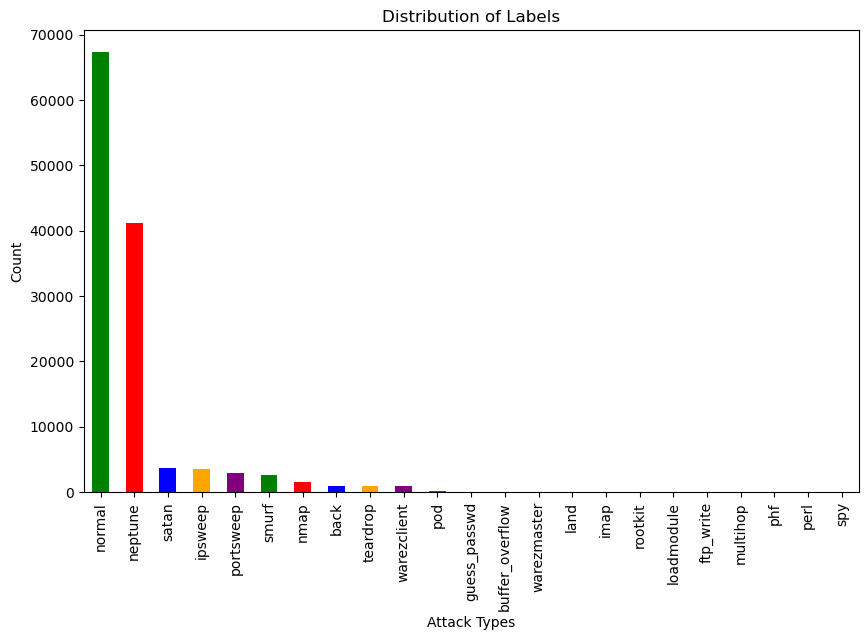

In [5]:
plt.figure(figsize=(10, 6))
df['labels'].value_counts().plot(kind='bar', color=['green', 'red', 'blue', 'orange', 'purple'])
plt.title('Distribution of Labels')
plt.xlabel('Attack Types')
plt.ylabel('Count')
plt.show()

In [6]:
# Attack Map
attack_map = {'normal': 'normal',
              'back': 'DoS',
              'land': 'DoS',
              'neptune': 'DoS',
              'pod': 'DoS',
              'smurf': 'DoS',
              'teardrop': 'DoS',
              'mailbomb': 'DoS',
              'apache2': 'DoS',
              'processtable': 'DoS',
              'udpstorm': 'DoS',
              'ipsweep': 'Probe',
              'nmap': 'Probe',
              'portsweep': 'Probe',
              'satan': 'Probe',
              'mscan': 'Probe',
              'saint': 'Probe',
              'ftp_write': 'R2L',
              'guess_passwd': 'R2L',
              'imap': 'R2L',
              'multihop': 'R2L',
              'phf': 'R2L',
              'spy': 'R2L',
              'warezclient': 'R2L',
              'warezmaster': 'R2L',
              'sendmail': 'R2L',
              'named': 'R2L',
              'snmpgetattack': 'R2L',
              'snmpguess': 'R2L',
              'xlock': 'R2L',
              'xsnoop': 'R2L',
              'worm': 'R2L',
              'buffer_overflow': 'U2R',
              'loadmodule': 'U2R',
              'perl': 'U2R',
              'rootkit': 'U2R',
              'httptunnel': 'U2R',
              'ps': 'U2R',
              'sqlattack': 'U2R',
              'xterm': 'U2R'}
df['attack_types'] = df['labels'].map(attack_map)

In [7]:
# Alert Map
alert_map = {'normal': 'No Alert',
             'DoS': 'DoS Alert',
             'Probe': 'Probe Alert',
             'R2L': 'R2L Alert',
             'U2R': 'U2R Alert'}
df['alerts'] = df['attack_types'].map(alert_map)

In [8]:
confusion_matrix = pd.crosstab(df['attack_types'], df['alerts'])
print(confusion_matrix)

alerts        DoS Alert  No Alert  Probe Alert  R2L Alert  U2R Alert
attack_types                                                        
DoS               45927         0            0          0          0
Probe                 0         0        11656          0          0
R2L                   0         0            0        995          0
U2R                   0         0            0          0         52
normal                0     67343            0          0          0


In [10]:
df_copy = df.copy()
X_df = df_copy.drop('attack_types', axis=1)
y_df = df_copy['attack_types']

# One-Hot Encoding
X_df = pd.get_dummies(X_df)

# Label Encoding
le = LabelEncoder()
y_df = le.fit_transform(y_df)

X = X_df.values
y = y_df

# Stratified Shuffle Split
sss = StratifiedShuffleSplit(n_splits=5, test_size=0.5, random_state=random_seed)
for train_index, test_index in sss.split(X, y):
    X_train_df, X_test_df = X_df.iloc[train_index], X_df.iloc[test_index]
    y_train_df, y_test_df = y_df[train_index], y_df[test_index]

X_train, X_test = X_train_df.values, X_test_df.values
y_train, y_test = y_train_df, y_test_df

# SMOTE for Oversampling
classifier = linear_model.SGDClassifier(loss='hinge', random_state=random_seed)
sm = SMOTE(random_state=random_seed)
X_sm, y_sm = sm.fit_resample(X_train, y_train)
classifier.fit(X_sm, y_sm)
y_pred = classifier.predict(X_test)

# Confusion Matrix for Each Attack Type
from sklearn.metrics import confusion_matrix

for attack_type in unique_attack_types:
    print(f'Confusion matrix for {attack_type}:\n')
    print(confusion_matrix(y_test == attack_type, y_pred == attack_type))
    print('\n')

Confusion matrix for 0:

[[39320   703]
 [ 6079 16885]]


Confusion matrix for 1:

[[34594 22565]
 [ 5390   438]]


Confusion matrix for 2:

[[61314  1176]
 [  497     0]]


Confusion matrix for 3:

[[61721  1240]
 [   26     0]]


Confusion matrix for 4:

[[21164  8151]
 [21843 11829]]




In [14]:
n_alert = len(np.unique(y_df))
cluster_seed = 42

# Get positive instances (i.e., attacks)
X_pos = X[np.where(y==1)[0]]

# Cluster using GMM
alert_cluster = GaussianMixture(n_components=n_alert, random_state=cluster_seed).fit(X_pos)
y_pos = alert_cluster.predict(X_pos)
y_pos += 1
print("Alert labels of X_pos: {}".format(collections.Counter(y_pos)))

# Get positive instances in the training and test sets
X_train_pos = X_train[np.where(y_train==1)[0]]
y_train_pos = alert_cluster.predict(X_train_pos)
y_train_pos += 1
print("Alert labels of X_train_pos: {}".format(collections.Counter(y_train_pos)))

X_test_pos = X_test[np.where(y_test==1)[0]]
y_test_pos = alert_cluster.predict(X_test_pos)
y_test_pos += 1
print("Alert labels of X_test_pos: {}".format(collections.Counter(y_test_pos)))

# Training Binary Classifier for each alert
alerts = [k+1 for k in range(n_alert)]
print("\nNow train a binary classifier for each alert:")

# Get the true positive data in the test set
X_tp_alert = X_test[np.where(np.logical_and(y_test==1, y_pred==1))[0]]
y_tp_alert = alert_cluster.predict(X_tp_alert)
y_tp_alert += 1

clfs = []
for alert in alerts:    
    print("#################################")
    print("Alert type {}".format(alert))
    
    # Decompose the multiclass classification to binary classifications
    X_tr = copy.deepcopy(X_train_pos)
    y_tr = np.where(y_train_pos==alert, 1, 0)
    X_te = copy.deepcopy(X_tp_alert)
    y_te = np.where(y_tp_alert==alert, 1, 0)

# Use Random Over Sampling to oversample the data
    ros = RandomOverSampler(random_state=42)
    X_tr_ros, y_tr_ros = ros.fit_resample(X_tr, y_tr)

# Train a classifier
    if alert != 6:
        clf_alert = linear_model.SGDClassifier(loss='hinge', random_state=cluster_seed)
    else:
        clf_alert = RandomForestClassifier(n_estimators = 5, random_state = cluster_seed)
    clf_alert.fit(X_tr_ros, y_tr_ros)

# Test the classifier
    y_te_pred = clf_alert.predict(X_te)
    print(confusion_matrix(y_te, y_te_pred))
    print(classification_report(y_te, y_te_pred))

    clfs.append(clf_alert)
    
    # Train a classifier
    if alert != 6:
        clf_alert = linear_model.SGDClassifier(loss='hinge', random_state=cluster_seed)
    else:
        clf_alert = RandomForestClassifier(n_estimators = 5, random_state = cluster_seed)
    clf_alert.fit(X_tr_ros, y_tr_ros)
    
    # Test the classifier
    y_te_pred = clf_alert.predict(X_te)
    print(confusion_matrix(y_te, y_te_pred))
    print(classification_report(y_te, y_te_pred))
    
    clfs.append(clf_alert)

Alert labels of X_pos: Counter({1: 11648, 3: 3, 2: 2, 5: 2, 4: 1})
Alert labels of X_train_pos: Counter({1: 5823, 5: 2, 2: 1, 4: 1, 3: 1})
Alert labels of X_test_pos: Counter({1: 5825, 3: 2, 2: 1})

Now train a binary classifier for each alert:
#################################
Alert type 1
[[  0   0]
 [ 47 391]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       1.00      0.89      0.94       438

    accuracy                           0.89       438
   macro avg       0.50      0.45      0.47       438
weighted avg       1.00      0.89      0.94       438

[[  0   0]
 [ 47 391]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       1.00      0.89      0.94       438

    accuracy                           0.89       438
   macro avg       0.50      0.45      0.47       438
weighted avg       1.00      0.89      0.94       438

########

In [15]:
X_pos_df = df.loc[y==1]
attack_duration = []
attack_number = []
for alert in alerts:
    X_alert_df = X_pos_df.loc[y_pos==alert]
    attack_duration.append(round(X_alert_df['duration'].mean(), 2))
    attack_number.append(X_alert_df.shape[0])
print("Average duration of each type of attack: {}".format(attack_duration))
print("Number of each type of attack: {}".format(attack_number))

Average duration of each type of attack: [2056.07, 35324.5, 24647.67, 10999.0, 39899.5]
Number of each type of attack: [11648, 2, 3, 1, 2]
